In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

GAM_rmse = [7.97,9.58,3.1,8.57,7.57] #rmse for no2 
#GAM_rmse = [4.81,4.78,4.2,5.51,6.06] #rmse for pm10
#GAM_rmse = [13.13,14.42,13.83,15.8,16.62] #rmse for o3

In [2]:
dataset = pd.read_csv('./che/df2.csv')
var = pd.read_csv('./che/no2_chosen_vars.csv')

pollutant = 'no2'

In [3]:
dataset = dataset.dropna(subset=[pollutant])
lr_rmse=[]
dt_rmse=[]
rf_rmse=[]
svr_rmse=[]

In [4]:
cities = ["Opfikon_Balsberg",
          "StGallen_Blumenbergplatz",
          "StGallen_Stuelegg",
          "Zuerich_Schimmelstrasse",
          "Zuerich_Stampfenbachstrasse"]

for c in cities:
    df=dataset[dataset['city']==c]
    
    df = df[['ws','wd','day_year','dew','pca','lagpca_year','lagpca_halfyear',
             'lagpca_12weeks','lagpca_8weeks','lagpca_4weeks','lagpca_2weeks',
             'lagpca_1week','lagws_4weeks','lagws_2weeks','lagws_1week','lagws_4weeks_max',
             'lagws_2weeks_max','lagws_1week_max','year','weekday','month','wx','wy',
             'h_lag1','t_lag1','wx_lag1','wy_lag1','ws_lag1','dew_lag1','h_lag2',
             't_lag2','wx_lag2','wy_lag2','ws_lag2','dew_lag2','h_lag3','t_lag3',
             'wx_lag3','wy_lag3','ws_lag3','dew_lag3',pollutant]]
    '''
    
    temp=var[var['Unnamed: 0']==c].iloc[:,1:].dropna(1).values[0]
    temp=np.append(temp,pollutant)
    df=df[temp]
    '''
    
    df = df.dropna()
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    
    rmse=mean_squared_error(y_test, y_pred,squared = False)
    lr_rmse.append(rmse)
    
    
    from sklearn.ensemble import RandomForestRegressor
    regressor=RandomForestRegressor()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    
    rmse=mean_squared_error(y_test, y_pred,squared = False)
    rf_rmse.append(rmse)
    
    
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    
    rmse=mean_squared_error(y_test, y_pred,squared = False)
    dt_rmse.append(rmse)
    
    
    from sklearn.svm import SVR
    regressor = SVR()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    
    rmse=mean_squared_error(y_test, y_pred,squared = False)
    svr_rmse.append(rmse)

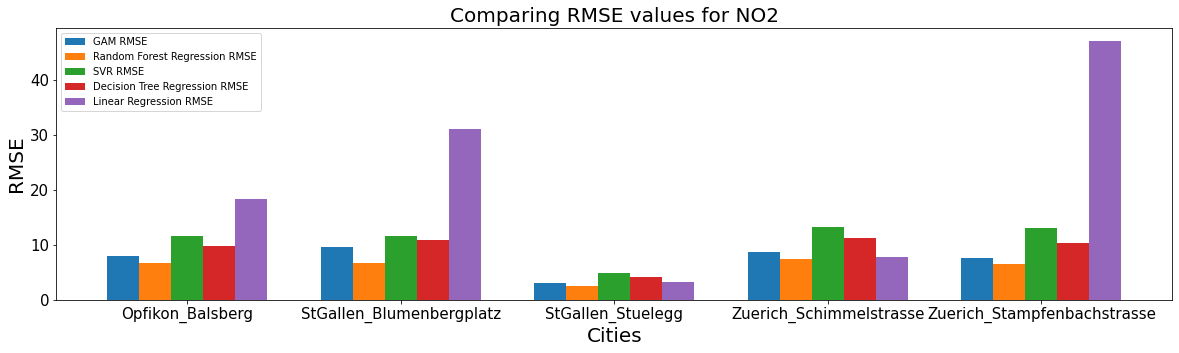

In [8]:
ind = np.arange(5)
width = 0.15

plt.figure(figsize=(20, 5))
plt.bar(ind, GAM_rmse, width, label='GAM RMSE')
plt.bar(ind + width * 1, rf_rmse, width, label='Random Forest Regression RMSE')
plt.bar(ind + width * 2, svr_rmse, width, label='SVR RMSE')
plt.bar(ind + width * 3, dt_rmse, width, label='Decision Tree Regression RMSE')
plt.bar(ind + width * 4, lr_rmse, width, label='Linear Regression RMSE')

plt.ylabel('RMSE', fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.title('Comparing RMSE values for '+ pollutant.upper(), fontsize=20)

plt.xticks(ind + width * 4 / 2, cities, rotation = 0, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best')

plt.savefig('./che/'+pollutant+'_rmse.png')

In [9]:
sum(rf_rmse)/5

5.966650690615678

In [10]:
sum(GAM_rmse)/5

7.358000000000001